### Clusterização - Case

- K-Means é um algoritmo de clusterização (ou agrupamento) disponível na biblioteca Scikit-Learn.

- É um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# lendo a base
df = pd.read_excel('mall_customers.xlsx')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.rename(columns = {'Age':'age','Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'}, inplace = True)

<AxesSubplot:>

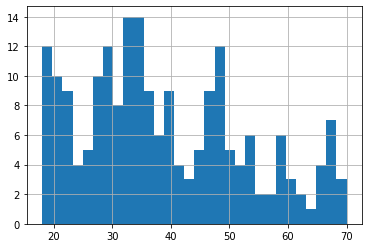

In [6]:
df['age'].hist(bins=30)

<AxesSubplot:>

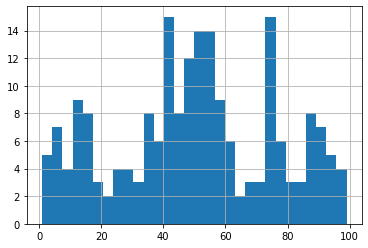

In [7]:
df['spending_score'].hist(bins=30)

In [8]:
x = df['age']
y = df['spending_score']
colors = ['b']

Text(0, 0.5, 'spending_score')

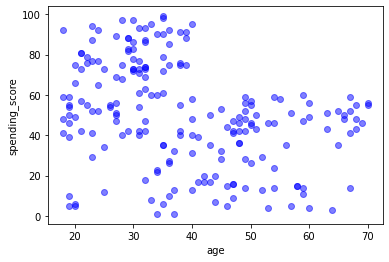

In [9]:
plt.scatter(x, y, c=colors, alpha=0.5)
plt.xlabel('age')
plt.ylabel('spending_score')

In [10]:
!pip install sklearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [11]:
import sklearn as sk
from sklearn.cluster import KMeans

In [12]:
kmeans_model = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [13]:
X = df[['age','spending_score']]

In [14]:
clusters = kmeans_model.fit_predict(X)

In [15]:
clusters

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [16]:
X['clusters'] = clusters

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
# label0 = X[X['clusters'] == 0]
# label1 = X[X['clusters'] == 1]
# label2 = X[X['clusters'] == 2]
# label3 = X[X['clusters'] == 3]
# label4 = X[X['clusters'] == 4]

Text(0, 0.5, 'spending_score')

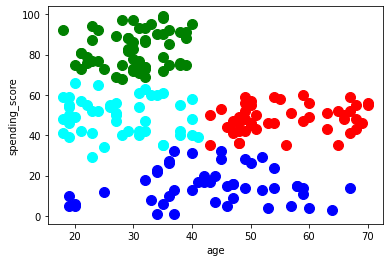

In [18]:
plt.scatter(X[X['clusters']==0]['age'], X[X['clusters']==0]['spending_score'], s=100, c='red', label ='Cluster 1')
plt.scatter(X[X['clusters']==1]['age'], X[X['clusters']==1]['spending_score'], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[X['clusters']==2]['age'], X[X['clusters']==2]['spending_score'], s=100, c='green', label ='Cluster 3')
plt.scatter(X[X['clusters']==3]['age'], X[X['clusters']==3]['spending_score'], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(X[X['clusters']==4]['age'], X[X['clusters']==4]['spending_score'], s=100, c='magenta', label ='Cluster 5')
plt.xlabel('age')
plt.ylabel('spending_score')

In [19]:
kmeans_model.inertia_

28165.58356662934

In [20]:
qtd_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
valores_inertia = []

In [22]:
for c in qtd_clusters:
    kmeans_model = KMeans(n_clusters=c,init='k-means++',random_state=42)
    X = df[['age','spending_score']]
    clusters = kmeans_model.fit_predict(X)
    valores_inertia.append(kmeans_model.inertia_)

In [23]:
valores_inertia

[171535.50000000003,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23838.24882164619,
 19483.1179104427,
 15514.193134351035,
 13006.48362885102,
 11738.020296954508,
 10173.039478114477]

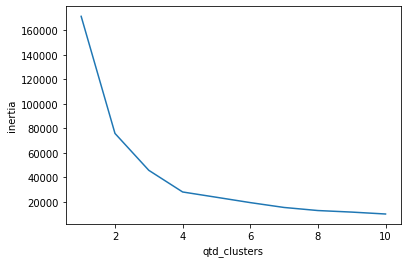

In [24]:
plt.plot(qtd_clusters, valores_inertia)
plt.xlabel('qtd_clusters')
plt.ylabel('inertia')
plt.show()